###  **User Engagement Analysis**
In this task we will track the user’s engagement using the following engagement metrics: 
* Sessions frequency 
* Duration of the session 
* Sessions total traffic (download and upload (MB))


In [26]:
# Import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.preprocessing import StandardScaler, normalize

In [2]:
import os
import sys
import warnings
warnings.filterwarnings('ignore')
sys.path.append(os.path.abspath(os.path.join('../scripts')))
from vis_plotly import * 
from df_outlier import *
import plots

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option("expand_frame_repr", False)
pd.set_option('display.float_format', '{:.2f}'.format)

In [4]:
# Read cleaned Telecom dataset

cleaned_df = pd.read_csv('../data/cleaned_Telecom_data.csv')
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148506 entries, 0 to 148505
Data columns (total 54 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unnamed: 0                      148506 non-null  int64  
 1   Unnamed:_0                      148506 non-null  int64  
 2   Bearer_Id                       148506 non-null  float64
 3   Start                           148506 non-null  object 
 4   Start_ms                        148506 non-null  float64
 5   End                             148506 non-null  object 
 6   End_ms                          148506 non-null  float64
 7   Dur._(ms)                       148506 non-null  float64
 8   IMSI                            148506 non-null  float64
 9   MSISDN_Number                   148506 non-null  float64
 10  IMEI                            148506 non-null  float64
 11  Last_Location_Name              148506 non-null  object 
 12  Avg_RTT_DL_(ms) 

### Task 2
Aggregate the above metrics per customer id (MSISDN) and report the top 10 customers per engagement metric

In [5]:
user_engagement_df = cleaned_df[['MSISDN_Number', 'Bearer_Id', 'Dur._(ms)', 'Total_Data_(Bytes)']].copy().rename(columns={
    'Bearer_Id': 'Session_Frequency', 'MSISDN_Number':'Customer_Id', 'Dur._(ms)': 'Duration', 'Total_Data_(Bytes)': 'Total_Data_Volume'})

In [6]:

user_engagement = user_engagement_df.groupby('Customer_Id').agg({'Session_Frequency': 'count', 'Duration': 'sum', 'Total_Data_Volume': 'sum'})
user_engagement.head(10)

,Session_Frequency,Duration,Total_Data_Volume
Customer_Id,,,
33601001722.00,1,116720.00,878690574.00
33601001754.00,1,181230.00,156859643.00
33601002511.00,1,134969.00,595966483.00
33601007832.00,1,49878.00,422320698.00
33601008617.00,2,37104.00,1457410944.00
33601010682.00,2,253983.00,615217221.00
33601011634.00,2,128360.00,654723066.00
33601011959.00,1,86399.00,332660357.00
33601014694.00,2,242249.00,990132189.00


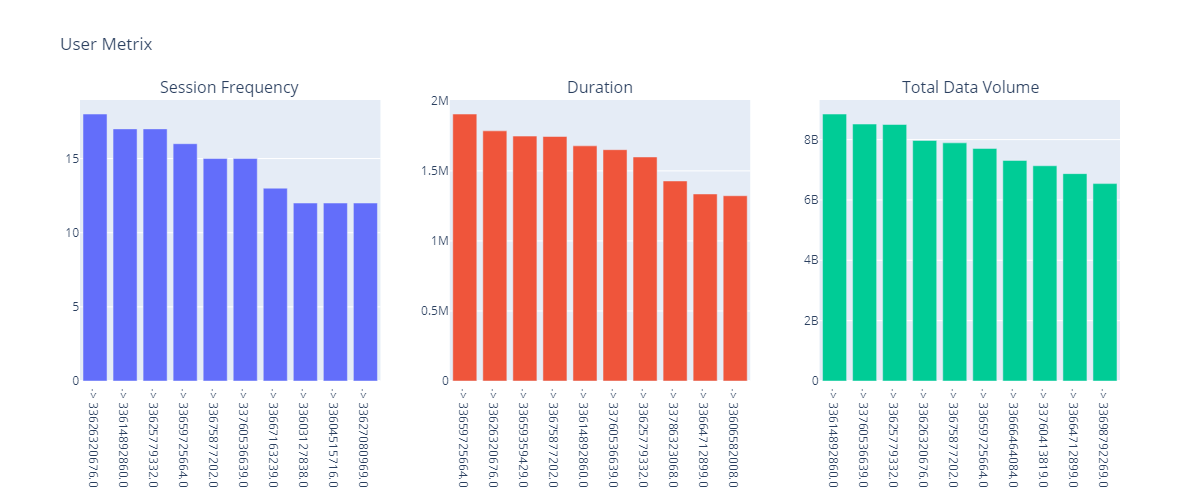

In [7]:
sessions = user_engagement.nlargest(10, "Session_Frequency")['Session_Frequency']
duration = user_engagement.nlargest(10, "Duration")['Duration']
total_data_volume = user_engagement.nlargest(10, "Total_Data_Volume")['Total_Data_Volume']

mult_hist([sessions, duration, total_data_volume], 1,
          3, "User Metrix", ['Session Frequency', 'Duration', 'Total Data Volume'])